# Clasificador de números

In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils        # Para generar las múltiples capas

from keras.layers.convolutional import Conv2D, MaxPooling2D     # Para las capas convulucionales
from keras.layers.core import Flatten, Dense                    # Red neuronal común

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)       # Semilla

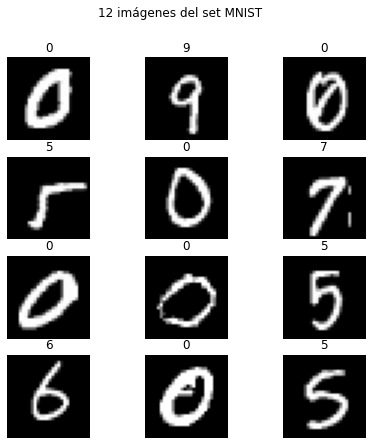

In [4]:
images = np.random.randint(0, x_train.shape[0], 12)
plt.figure(figsize=(7, 7))

for i in range(len(images)):
    img = x_train[images[i], : , :]
    plt.subplot(4, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(y_train[images[i]])
plt.suptitle('12 imágenes del set MNIST')
plt.show()

## Normalizar los datos

Como son imágenes, los valores de los píxeles oscilan entre 0 y 255, pero se requieren que estén entre 0 y 1, por tanto se dividen entre 255

In [10]:
X_train = x_train/255.0
X_test = x_test/255.0

En este conjunto de datos tenemos 10 categorias. Estas se pueden representar con el formato one-hot. Acá se tiene un vector de 10 elementos (es decir el mismo número de categorías) donde sólo uno de estos elementos será diferente de cero. Por ejemplo, si la categoria es 0 la representación one-hot correspondiente será el arreglo [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
n_classes = 10

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

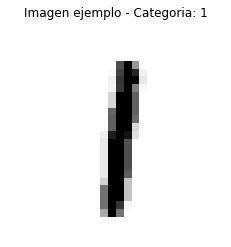

In [12]:
n_img = 40

plt.imshow(X_train[n_img, :].reshape(28, 28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoria: ' + str(np.argmax(Y_train[n_img])))
plt.axis('off')
plt.show()

Indicar que se solo se usara un canal de color (escala de grises)

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## Construcción del modelo

Contruir el modelo de red neuronal

In [14]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Aplanar la red para que se convierta en un vector y crear la red neuronal con 2 capas ocultas

In [15]:
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compilar el modelo

Se utiliza el optimizer SGD porque es un ejemplo multiclase

In [17]:
import tensorflow as tf
from tensorflow import keras

model.compile(keras.optimizers.SGD(0.2), loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento

Se harán 50 iteraciones, en lotes de 128 y que se imprima la información. Con validation_data evalúa de una vez la precisión de la validación

In [18]:
model_entrenado = model.fit(X_train, Y_train, epochs=50, batch_size=128, verbose=2, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 - 32s - loss: 0.3523 - accuracy: 0.8851 - val_loss: 0.0858 - val_accuracy: 0.9708
Epoch 2/50
469/469 - 2s - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0478 - val_accuracy: 0.9844
Epoch 3/50
469/469 - 2s - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 4/50
469/469 - 2s - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0384 - val_accuracy: 0.9870
Epoch 5/50
469/469 - 2s - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 6/50
469/469 - 2s - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 7/50
469/469 - 2s - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0366 - val_accuracy: 0.9889
Epoch 8/50
469/469 - 2s - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 9/50
469/469 - 2s - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0453 - val_accuracy: 0.9848
Epoch 10/50
469/469 - 2s - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0425 - val_accuracy: 0.988

Text(0.5, 0, 'Iteración')

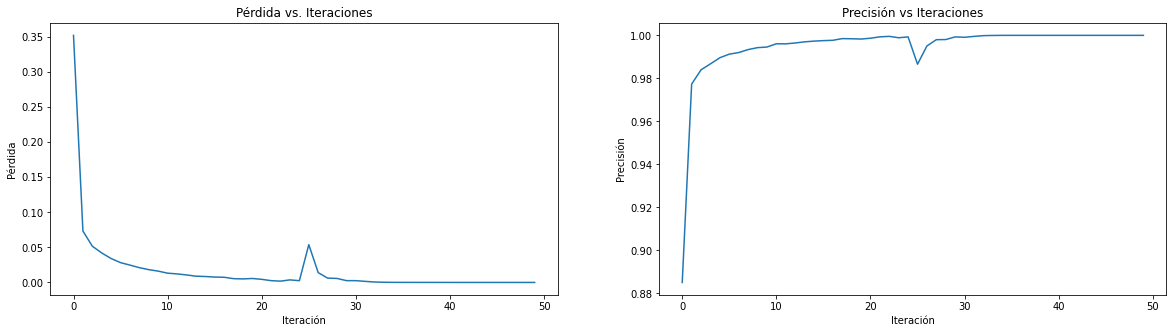

In [19]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(model_entrenado.history['loss'])
plt.title('Pérdida vs. Iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1, 2, 2)
plt.plot(model_entrenado.history['accuracy'])
plt.title('Precisión vs Iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

## Validación

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Precisión en el set de validación {100 * score[1]}')

Precisión en el set de validación 99.16999936103821


Precisión en el set de validación: 99.2%


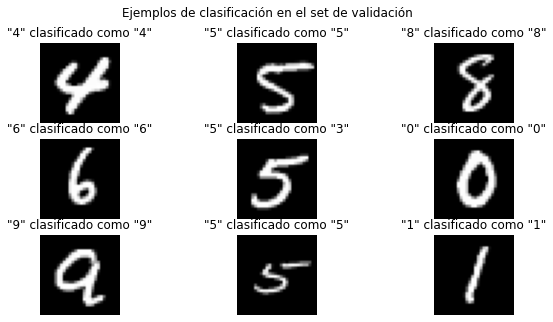

In [21]:
puntaje = model.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))
Y_pred = model.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()


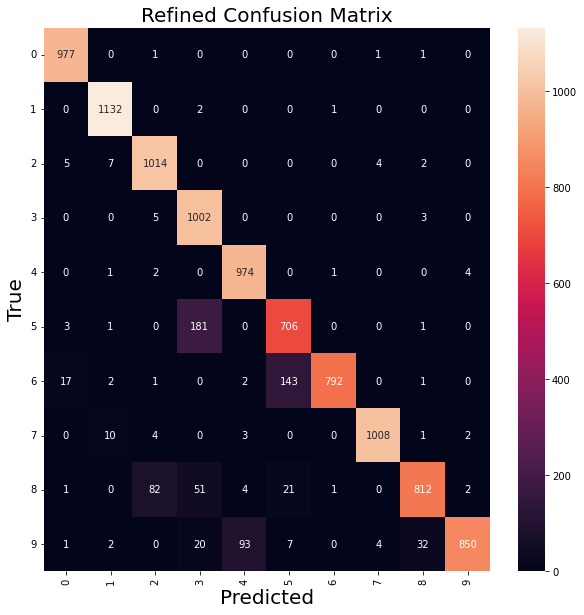

In [22]:
#Matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
#Y_pred = modelo.predict(X_test)
#classes_y=np.argmax(Y_pred,axis=1)
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


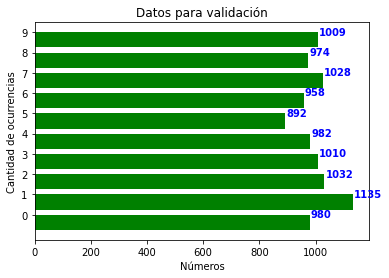

In [24]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo = Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)

for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))   # ubicaciones de los grupos
width = 0.75                            # ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()
